# Off-Platform Project: Classifying Tweets

In this off-platform project, you will use a Naive Bayes Classifier to find patterns in real tweets. We've given you three files: `new_york.json`, `london.json`, and `paris.json`. These three files contain tweets that we gathered from those locations.

The goal is to create a classification algorithm that can classify any tweet (or sentence) and predict whether that sentence came from New York, London, or Paris.

# Investigate the Data

To begin, let's take a look at the data. We've imported `new_york.json` and printed the following information:
* The number of tweets.
* The columns, or features, of a tweet.
* The text of the 12th tweet in the New York dataset.

Run the cell below to see the results.

In [54]:
import pandas as pd

new_york_tweets = pd.read_json("new_york.json", lines=True)
print(len(new_york_tweets))
print(new_york_tweets.columns)
print(new_york_tweets.loc[12]["text"])

4723
Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'timestamp_ms', 'extended_tweet',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_entities',
       'withheld_in_countries'],
      dtype='object')
Be best #ThursdayThoughts


In the code block below, load the London and Paris tweets into DataFrames named `london_tweets` and `paris_tweets`.

How many London tweets are there? How many Paris ones are there?

In [55]:
london_tweets = pd.read_json("london.json", lines=True)
paris_tweets = pd.read_json("paris.json", lines=True)

# I know it didn't ask how many New York tweets there are but I want to know
print('There are {} New York, {} London and {} Paris tweets'.format(len(new_york_tweets), len(london_tweets), len(paris_tweets)))

There are 4723 New York, 5341 London and 2510 Paris tweets


# Classifying using language: Naive Bayes Classifier

We're going to create a Naive Bayes Classifier! Let's begin by looking at the way language is used differently in these three locations. Let's grab the text of all of the tweets and make it one big list. In the code block below, we've created a list of all the New York tweets. Do the same for `london_tweets` and `paris_tweets`.

Then combine all three into a variable named `all_tweets` by using the `+` operator. For example, `all_tweets = new_york_text + london_text + ...`

Let's also make the labels associated with those tweets. `0` represents a New York tweet, `1`  represents a London tweet, and `2` represents a Paris tweet. Finish the definition of `labels`.

In [56]:
new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()
paris_text = paris_tweets["text"].tolist()

all_tweets = new_york_text + london_text + paris_text
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

# Making a Training and Test Set

We can now break our data into a training set and a test set. We'll use scikit-learn's `train_test_split` function to do this split. This function takes two required parameters: It takes the data, followed by the labels. Set the optional parameter `test_size` to be `0.2`. Finally, set the optional parameter `random_state` to `1`. This will make it so your data is split in the same way as the data in our solution code. 

Remember, this function returns 4 items in this order:
1. The training data
2. The testing data
3. The training labels
4. The testing labels

Store the results in variables named `train_data`, `test_data`, `train_labels`, and `test_labels`.

Print the length of `train_data` and the length of `test_data`.

In [57]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels, test_size=0.2, random_state=1)
print("Train_data length: {} \n\
Test_data length: {}".format(len(train_data), len(test_data)))

Train_data length: 10059 
Test_data length: 2515


# Making the Count Vectors

To use a Naive Bayes Classifier, we need to transform our lists of words into count vectors. Recall that this changes the sentence `"I love New York, New York"` into a list that contains:

* Two `1`s because the words `"I"` and `"love"` each appear once.
* Two `2`s because the words `"New"` and `"York"` each appear twice.
* Many `0`s because every other word in the training set didn't appear at all.

To start, create a `CountVectorizer` named `counter`.

Next, call the `.fit()` method using `train_data` as a parameter. This teaches the counter our vocabulary.

Finally, let's transform `train_data` and `test_data` into Count Vectors. Call `counter`'s `.transform()` method using `train_data` as a parameter and store the result in `train_counts`. Do the same for `test_data` and store the result in `test_counts`.

Print `train_data[3]` and `train_counts[3]` to see what a tweet looks like as a Count Vector.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
# create object
counter = CountVectorizer()

# teach obj vocab
counter.fit(train_data)

# create count objects
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [59]:
print(train_data[3])

saying bye is hard. Especially when youre saying bye to comfort.


In [60]:
print(train_counts[3])

  (0, 5022)	2
  (0, 6371)	1
  (0, 9552)	1
  (0, 12314)	1
  (0, 13903)	1
  (0, 23994)	2
  (0, 27146)	1
  (0, 29397)	1
  (0, 30274)	1


# Train and Test the Naive Bayes Classifier

We now have the inputs to our classifier. Let's use the CountVectors to train and test the Naive Bayes Classifier!

First, make a `MultinomialNB` named `classifier`.

Next, call `classifier`'s `.fit()` method. This method takes two parameters &mdash; the training data and the training labels. `train_counts` contains the training data and `train_labels` containts the labels for that data.

Calling `.fit()` calculates all of the probabilities used in Bayes Theorem. The model is now ready to quickly predict the location of a new tweet. 

Finally, let's test our model. `classifier`'s `.predict()` method using `test_counts` as a parameter. Store the results in a variable named `predictions`.

In [61]:
from sklearn.naive_bayes import MultinomialNB

# create classifier object
classifier = MultinomialNB()

# train classifier
classifier.fit(train_counts, train_labels)

# make predictions
predictions = classifier.predict(test_counts)

# Evaluating Your Model

Now that the classifier has made its predictions, let's see how well it did. Let's look at two different ways to do this. First, call scikit-learn's `accuracy_score` function. This function should take two parameters &mdash;  the `test_labels` and your `predictions`. Print the results. This prints the percentage of tweets in the test set that the classifier correctly classified.



In [62]:
from sklearn.metrics import accuracy_score

#print accuracy
accuracy = accuracy_score(test_labels, predictions)
print("{:.2f}% tweets accurately classified".format(accuracy*100))

67.79% tweets accurately classified


The other way you can evaluate your model is by looking at the **confusion matrix**. A confusion matrix is a table that describes how your classifier made its predictions. For example, if there were two labels, A and B, a confusion matrix might look like this:

```
9 1
3 5
```

In this example, the first row shows how the classifier classified the true A's. It guessed that 9 of them were A's and 1 of them was a B. The second row shows how the classifier did on the true B's. It guessed that 3 of them were A's and 5 of them were B's.

For our project using tweets, there were three classes &mdash; `0` for New York, `1` for London, and `2` for Paris. You can see the confustion matrix by printing the result of the `confusion_matrix` function using `test_labels` and `predictions` as parameters.

In [63]:
from sklearn.metrics import confusion_matrix

# print confusion_matrix
matrix = confusion_matrix(test_labels, predictions)
print(matrix)

[[541 404  28]
 [203 824  34]
 [ 38 103 340]]


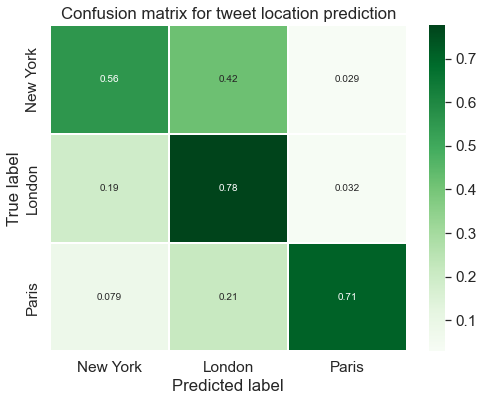

In [64]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# plot confusion matrix

# Get and reshape confusion matrix data - assumes confusion matrix already calculated
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['New York', 'London', 'Paris']
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for tweet location prediction')
plt.show()

# Test Your Own Tweet

Nice work! The confusion matrix should line up with your intuition. The classifier predicts tweets that were actually from New York as either New York tweets or London tweets, but almost never Paris tweets. Similarly, the classifier rarely misclassifies the tweets that were actually from Paris. Tweets coming from two English speaking countries are harder to distinguish than tweets in different languages.

Now it's your chance to write a tweet and see how the classifier works! Create a string and store it in a variable named `tweet`. 

Call `counter`'s `.transform()` method using `[tweet]` as a parameter. Save the result as `tweet_counts`. Notice that your variable has to be in an array &mdash; `.transform()` can't take just a string, it must be a list. 

Finally, pass `tweet_counts` as parameter to `classifier`'s `.predict()` method. Print the result. This should give you the prediction for the tweet. Remember a `0` represents New York, a `1` represents London, and a `2` represents Paris. Can you write different tweets that the classifier predicts as being from New York, London, and Paris?

In [65]:
columbia = "This #EarthDay, we celebrate the arrival of two new Columbians and the dozens of names suggested by you for their parents! We've narrowed them down to three—which one grabs you most? https://bit.ly/3LfhZhy  @CC_Columbia @BirdCentralPark"
imperial = "#OnThisDay 1970: The first #EarthDay was celebrated to demonstrate support for environmental protection. Happy Earth Day! 🌍"
sorbonne = "#EarthDay 🌍 Contribuez à l'inventaire des plantes et animaux d'Île-de-France en participant au défi \"Nature Urbaine Paris Île-de-France\" du 29 avril au 2 mai 👉 https://swll.to/VibqZ"

In [66]:
tweet_counts = counter.transform([columbia, imperial, sorbonne])

In [67]:
classifier.predict(tweet_counts)

array([0, 0, 2])

In [68]:
classifier.predict_proba(tweet_counts)

array([[5.85286583e-01, 4.14713417e-01, 1.97660188e-22],
       [7.67375990e-01, 2.32624005e-01, 4.76509993e-09],
       [9.78996140e-21, 2.29823901e-20, 1.00000000e+00]])

Here, 'columbia' is a tweet from Columbia University (New York), 'imperial' is from Imperial College London (London), and 'sorbonne' is from Sorbonne Université (Paris). All are about Earth Day, which is a coincidence related to when I'm doing this project.
As a reminder:  
0 = New York
1 = London
2 = Paris.

So, given 'classifier.predict' gives [0, 0, 2], it is correctly classifying 'columbia' and 'paris', and miss-classifying 'imperial' as New York. Looking at the probabilities given by 'predict-proba', it isn't even a close miss-call (77% chance it is from New York vs 23% chance it is from London, and negligible chance it is from Paris).

I'll re-run with some non-Earth Day tweets from the week before:

In [69]:
columbia2 = "Carla Hayden, the 14th Librarian of Congress, will receive an honorary Doctor of Letters degree. https://bit.ly/3JM9skn  @LibnOfCongress"
imperial2 = "Our Undergraduate Open Days are back! We're pleased to welcome you to our South Kensington Campus on Wednesday 29 and Thursday 30 June. Discover more about life at Imperial. Register your interest here and be the first to know when bookings go live ⤵️ http://ow.ly/EaPY50IHvTQ" 
sorbonne2 = "🤔Saviez-vous que l'acoustique de #NotreDame a été en partie détruite lors de l'incendie survenu il y a 3 ans, le 15 avril 2019 ? Mais comment retrouver l'#acoustique réverbérante propre à la cathédrale ? Réponse de Brian Katz, acousticien  @LAM_dAlembert ➡️https://swll.to/fBWQmcb"

In [70]:
tweet_counts2 = counter.transform([columbia2, imperial2, sorbonne2])
classifier.predict(tweet_counts2)

array([1, 1, 2])

Wrong again! This time:  
New York -> London
London -> London
Paris -> Paris